1) Reading all files and just combining complete data

In [ ]:
# Import necessary libraries
import pandas as pd
import os

# Step 1: Define the directory containing the uploaded files
# In Colab, uploaded files are in the current working directory
uploaded_files_dir = '.'  # Adjust this if you have a specific directory for your files

# Step 2: Get all CSV files in the directory
csv_files = [file for file in os.listdir(uploaded_files_dir) if file.endswith('.csv')]

# Step 3: Combine all CSV files
dataframes = []
for file_name in csv_files:
    print(f"Reading {file_name}...")
    df = pd.read_csv(file_name)
    dataframes.append(df)

# Combine all DataFrames into one
consolidated_data = pd.concat(dataframes, ignore_index=True)

# Step 4: Save the consolidated dataset
output_file = 'consolidated_data.csv'
consolidated_data.to_csv(output_file, index=False)
print(f"Consolidation complete. File saved as {output_file} in Colab.")


Reading 11 Nov.csv...
Reading 08 Aug.csv...
Reading 10 Oct.csv...
Reading 04 April.csv...
Reading 07 July.csv...
Reading 12 Dec.csv...
Reading 06 June.csv...
Reading 01 Jan.csv...
Reading 05 May.csv...
Reading 09 Nov.csv...
Reading 03 March.csv...
Reading 02 Feb.csv...
Consolidation complete. File saved as consolidated_data.csv in Colab.


2) Getting number of line items

In [ ]:
# Read the consolidated CSV file (if not already loaded)
df = pd.read_csv('consolidated_data.csv')  # Replace with your file name if different

# Get the number of rows (line items)
line_items_count = len(df)

print(f"The number of line items in the dataset is: {line_items_count}")

The number of line items in the dataset is: 1961484


3) Removing extra coumns

In [ ]:
# Read the consolidated CSV file
df = pd.read_csv('consolidated_data.csv')  # Replace with your file name if different

# Drop the specified columns
columns_to_remove = ['YEAR', 'DEP_TIME', 'FLIGHTS']
df_cleaned = df.drop(columns=columns_to_remove, errors='ignore')

# Save the cleaned dataset
output_file = 'cleaned_data.csv'
df_cleaned.to_csv(output_file, index=False)

print(f"Columns {columns_to_remove} removed. Cleaned data saved as {output_file}.")


Columns ['YEAR', 'DEP_TIME', 'FLIGHTS'] removed. Cleaned data saved as cleaned_data.csv.


4.1 Step 4: Selecting Top 10 Cities

In [ ]:
# Step 4: Selecting top 10 cities
file_path = 'cleaned_data.csv'  # Replace with your file name
df = pd.read_csv(file_path)

# Print the number of rows in the dataset
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

# Get the top 10 origin cities by flight count
top_cities = df['ORIGIN_CITY_NAME'].value_counts().head(10)

# Display the top 10 cities
print("\nTop 10 Origin Cities Based on Number of Flights:")
print(top_cities)

# Filter the dataset to include only the top 10 origin cities
top_cities_list = top_cities.index.tolist()
df_filtered = df[df['ORIGIN_CITY_NAME'].isin(top_cities_list)]

# Save the filtered dataset
output_file = 'filtered_data_top_10_cities.csv'
df_filtered.to_csv(output_file, index=False)
print(f"\nFiltered data with top 10 cities saved as {output_file}.")

file_path = 'filtered_data_top_10_cities.csv'  # Replace with your file name
df = pd.read_csv(file_path)

# Print the number of rows in the dataset
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")


Number of rows in the dataset: 1961484

Top 10 Origin Cities Based on Number of Flights:
ORIGIN_CITY_NAME
New York, NY             299738
Chicago, IL               92985
Atlanta, GA               74370
Dallas/Fort Worth, TX     64575
Denver, CO                62243
Washington, DC            57072
Charlotte, NC             55772
Houston, TX               45547
Los Angeles, CA           42980
Orlando, FL               40981
Name: count, dtype: int64

Filtered data with top 10 cities saved as filtered_data_top_10_cities.csv.
Number of rows in the dataset: 836263


5) Cleaning the Date Format

In [ ]:
# Step 5: Cleaning and extracting date from FL_DATE
file_path = 'filtered_data_top_10_cities.csv'  # Replace with your file name
df = pd.read_csv(file_path)

# Ensure FL_DATE is treated as a string
df['FL_DATE'] = df['FL_DATE'].astype(str)

# Normalize the formats in FL_DATE
# Handle MM-DD-YYYY and MM/DD/YYYY formats
df['FL_DATE'] = df['FL_DATE'].str.extract(r'(\d{2}-\d{2}-\d{4})|(\d{2}/\d{2}/\d{4})')[0].fillna(
    df['FL_DATE'].str.extract(r'(\d{2}-\d{2}-\d{4})|(\d{2}/\d{2}/\d{4})')[1]
)

# Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%m-%d-%Y', errors='coerce').fillna(
    pd.to_datetime(df['FL_DATE'], format='%m/%d/%Y', errors='coerce')
)

# Handle invalid dates
df['FL_DATE'] = df['FL_DATE'].fillna(pd.Timestamp('1900-01-01'))  # Default for invalid dates

# Extract Month and Date
df['Month'] = df['FL_DATE'].dt.month
df['Date'] = df['FL_DATE'].dt.day

# Drop the original FL_DATE column
df = df.drop(columns=['FL_DATE'])

# Save the updated dataset
output_file = 'updated_data_with_cleaned_date.csv'
df.to_csv(output_file, index=False)
print(f"'Month' and 'Date' extracted and 'FL_DATE' cleaned. Updated data saved as {output_file}.")


'Month' and 'Date' extracted and 'FL_DATE' cleaned. Updated data saved as updated_data_with_cleaned_date.csv.


6) Weather data conversion

In [ ]:
file_path = 'updated_data_with_cleaned_date.csv'  # Replace with the file name if needed
df = pd.read_csv(file_path)

# Print the number of rows in the filtered dataset
num_rows = df.shape[0]
print(f"Number of rows in the filtered dataset: {num_rows}")

# Define thresholds for weather delay categories
def categorize_weather_delay(delay):
    if pd.isna(delay) or delay == 0:  # No delay or missing data
        return 'favorable'
    elif delay <= 30:  # Minor delay
        return 'risky'
    else:  # Significant delay
        return 'unfavorable'

# Convert `WEATHER_DELAY` to categories
df['Weather_Category'] = df['WEATHER_DELAY'].apply(categorize_weather_delay)

# Remove the original `WEATHER_DELAY` column
df = df.drop(columns=['WEATHER_DELAY'])

# Save the updated dataset
output_file = 'filtered_data_after_weather_update.csv'
df.to_csv(output_file, index=False)

print(f"\nWeather delay categorized and original `WEATHER_DELAY` column removed. Updated data saved as {output_file}.")


Number of rows in the filtered dataset: 836263

Weather delay categorized and original `WEATHER_DELAY` column removed. Updated data saved as filtered_data_after_weather_update.csv.


7) NAS delay converison

In [ ]:
file_path = 'filtered_data_after_weather_update.csv'  # Replace with the file name if needed
df = pd.read_csv(file_path)

# Print the number of rows in the dataset
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

# Define thresholds for NAS delay categories
def categorize_nas_delay(delay):
    if pd.isna(delay) or delay == 0:  # No delay or missing data
        return 'favorable'
    elif delay <= 30:  # Minor delay
        return 'risky'
    else:  # Significant delay
        return 'unfavorable'

# Convert `NAS_DELAY` to categories
df['NAS_Category'] = df['NAS_DELAY'].apply(categorize_nas_delay)

# Remove the original `NAS_DELAY` column
df = df.drop(columns=['NAS_DELAY'])

# Save the updated dataset
output_file = 'filtered_data_after_nas_update.csv'
df.to_csv(output_file, index=False)

print(f"\nNAS delay categorized and original `NAS_DELAY` column removed. Updated data saved as {output_file}.")


Number of rows in the dataset: 836263

NAS delay categorized and original `NAS_DELAY` column removed. Updated data saved as filtered_data_after_nas_update.csv.


8) Categorize the Carrier as reliable or unreliable , remove "LATE_AIRCRAFT_DELAY" and "Year"columns

In [ ]:
import pandas as pd
# Load the dataset after NAS update
file_path = 'filtered_data_after_nas_update.csv'  # Replace with the file name if needed
df = pd.read_csv(file_path)

# Print the number of rows in the dataset
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

# Step 1: Calculate the historical average delay for each carrier
carrier_avg_delay = df.groupby('OP_CARRIER_FL_NUM')['CARRIER_DELAY'].mean()

# Step 2: Map historical average delay back to the original DataFrame
df['Carrier_Avg_Delay'] = df['OP_CARRIER_FL_NUM'].map(carrier_avg_delay)

# Step 3: Categorize delays based on historical averages
def categorize_carrier_delay(row):
    if pd.isna(row['CARRIER_DELAY']) or row['CARRIER_DELAY'] <= row['Carrier_Avg_Delay']:
        return 'reliable'
    else:
        return 'unreliable'

df['Carrier_Category'] = df.apply(categorize_carrier_delay, axis=1)

# Step 4: Remove the `CARRIER_DELAY`, `LATE_AIRCRAFT_DELAY` columns
df = df.drop(columns=['CARRIER_DELAY', 'Carrier_Avg_Delay', 'LATE_AIRCRAFT_DELAY', ])

# Save the updated dataset
output_file = 'filtered_data_after_carrier_update.csv'
df.to_csv(output_file, index=False)

print(f"\nCarrier delay categorized as `reliable` or `unreliable`, and `CARRIER_DELAY`, and `LATE_AIRCRAFT_DELAY` columns removed.")
print(f"Updated data saved as {output_file}.")


Number of rows in the dataset: 836263

Carrier delay categorized as `reliable` or `unreliable`, and `CARRIER_DELAY`, `LATE_AIRCRAFT_DELAY`, `YEAR`, and `FLIGHTS` columns removed.
Updated data saved as filtered_data_after_carrier_update.csv.


1) Upload and Read the Dataset

In [1]:
# Import necessary libraries
import pandas as pd

# Install necessary libraries
!pip install catboost xgboost --quiet

# Import models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset
file_path = 'filtered_data_after_carrier_update.csv'  # Update the file path as needed
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:")
print(data.info())

# Preview the data
print("\nDataset Preview:")
print(data.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277300 entries, 0 to 277299
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAY_OF_WEEK        277300 non-null  int64  
 1   OP_UNIQUE_CARRIER  277300 non-null  object 
 2   TAIL_NUM           276617 non-null  object 
 3   OP_CARRIER_FL_NUM  277300 non-null  int64  
 4   ORIGIN_AIRPORT_ID  277300 non-null  int64  
 5   ORIGIN_CITY_NAME   277300 non-null  object 
 6   DEST_AIRPORT_ID    277300 non-null  int64  
 7   DEST_CITY_NAME     277300 non-null  object 
 8   CRS_DEP_TIME       277299 non-null  float64
 9   DEP_DELAY          270565 non-null  float64
 10  AIR_TIME           154908 non-null  float64
 11  DISTANCE           161570 non-null  float64
 12  Month              277299 non-null  float64
 13  Date               277299 non-null  float64
 14  W

2) Data Cleaning

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Drop `TAIL_NUM` and handle missing values
data = data.drop(columns=['TAIL_NUM'], errors='ignore')
data = data.dropna(subset=['DEP_DELAY'])  # Drop rows with missing target variable
columns_to_impute = ['AIR_TIME', 'DISTANCE']
imputer = SimpleImputer(strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Encode categorical features
object_columns = data.select_dtypes(include=['object']).columns
print(f"Object Columns to Encode: {object_columns}")

label_encoders = {}
for column in object_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

print("\nData After Encoding:")
print(data.info())


<ipython-input-2-df2e44c7fdd9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])


Object Columns to Encode: Index(['OP_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME',
       'Weather_Category', 'NAS_Category', 'Carrier_Category'],
      dtype='object')

Data After Encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 270565 entries, 0 to 277298
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAY_OF_WEEK        270565 non-null  int64  
 1   OP_UNIQUE_CARRIER  270565 non-null  int64  
 2   OP_CARRIER_FL_NUM  270565 non-null  int64  
 3   ORIGIN_AIRPORT_ID  270565 non-null  int64  
 4   ORIGIN_CITY_NAME   270565 non-null  int64  
 5   DEST_AIRPORT_ID    270565 non-null  int64  
 6   DEST_CITY_NAME     270565 non-null  int64  
 7   CRS_DEP_TIME       270565 non-null  float64
 8   DEP_DELAY          270565 non-null  float64
 9   AIR_TIME           270565 non-null  float64
 10  DISTANCE           270565 non-null  float64
 11  Month              270565 non-null  float64
 12  Dat

Step 3: Feature Engineering

In [3]:
# Extract hour from CRS_DEP_TIME (scheduled departure time)
data['DEP_HOUR'] = (data['CRS_DEP_TIME'] // 100).astype(int)

# Preview to confirm the DEP_HOUR column
print(data[['CRS_DEP_TIME', 'DEP_HOUR']].head())



   CRS_DEP_TIME  DEP_HOUR
0        1029.0        10
1        1629.0        16
2        1559.0        15
3         900.0         9
4        1520.0        15


Step 4: Scale features

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Ensure all columns in X are numeric
# Select only numeric columns for scaling
X = data.select_dtypes(include=['float64', 'int64']).copy()

# Drop the target column (DEP_DELAY) if present in X
X = X.drop(columns=['DEP_DELAY'], errors='ignore')

# Extract the target variable
y = data['DEP_DELAY']

# Handle missing or invalid data (e.g., strings or NaNs)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert strings to NaNs
X = X.fillna(X.median())  # Fill NaNs with median values

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional, for easier debugging)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Apply PCA (optional, as per your existing code)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Number of components selected: {pca.n_components_}")

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Confirm no missing values in the target variable
print(f"Missing values in y_train: {y_train.isna().sum()}")
print(f"Missing values in y_test: {y_test.isna().sum()}")


Explained variance ratio by PCA components: [0.15247231 0.12767456 0.10914604 0.1055534  0.09870499 0.07003231
 0.06454585 0.06230222 0.06124148 0.05156601 0.03697002 0.0209865 ]
Number of components selected: 12
Missing values in y_train: 0
Missing values in y_test: 0


Step 5: Train Traditional Models

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Install required libraries
!pip install catboost xgboost --quiet

# Define models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred, threshold=20):  # Adjust threshold to 20
    correct_predictions = abs(y_true - y_pred) <= threshold
    return (correct_predictions.sum() / len(y_true)) * 100

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = calculate_accuracy(y_test, y_pred, threshold=20)
    results[name] = {"MSE": mse, "R2": r2, "Accuracy (%)": accuracy}

# Display results
results_df = pd.DataFrame(results).T
print("\nTraditional Model Performance:")
print(results_df)



Traditional Model Performance:
                       MSE        R2  Accuracy (%)
Decision Tree  4799.996247 -0.530534     76.475299
Random Forest  2406.075909  0.232795     78.322040
CatBoost       2322.158307  0.259553     81.562154
XGBoost        2417.353070  0.229199     81.454971


Step 6: Build and Train DNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the DNN model
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = dnn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
dnn_mse, dnn_mae = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"\nDNN Model - MSE: {dnn_mse}, MAE: {dnn_mae}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 2301.9048 - mae: 17.7640 - val_loss: 2215.2483 - val_mae: 16.6029
Epoch 2/50
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2213.6467 - mae: 17.3706 - val_loss: 2209.7554 - val_mae: 17.0489
Epoch 3/50
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 2196.7573 - mae: 17.5379 - val_loss: 2215.6465 - val_mae: 17.8005
Epoch 4/50
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 2192.9539 - mae: 17.5453 - val_loss: 2208.3572 - val_mae: 16.4736
Epoch 5/50
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 2211.8811 - mae: 17.3162 - val_loss: 2210.1309 - val_mae: 17.4338
Epoch 6/50
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 2193.7456 - mae: 17.4412 - val_loss: 2195.8848 - val_mae: 17.0786
Epoch 7/50
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 2110.0176 - mae: 17.3256 - val_loss: 2207.2156 - val_mae: 16.5877
Epoch 8/50
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 2136.1028 - mae: 17.2856 - val_los

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Generate predictions on the test set
y_pred = dnn_model.predict(X_test).flatten()  # Flatten to match dimensions with y_test

# Calculate R² score
dnn_r2 = r2_score(y_test, y_pred)

# Calculate accuracy
# Assuming it's a regression task; for classification, modify accordingly
# Convert predictions and y_test to binary (e.g., threshold = 0.5 for classification)
# Example for binary classification:
# y_pred_binary = (y_pred > 0.5).astype(int)
# y_test_binary = y_test.astype(int)
# dnn_accuracy = accuracy_score(y_test_binary, y_pred_binary)

# If regression, accuracy isn't directly applicable. Skip or redefine based on task.

# Update results dictionary
results['DNN'] = {
    "MSE": mean_squared_error(y_test, y_pred),
    "R2": dnn_r2,
    "Accuracy (%)": None  # Update with binary classification accuracy if applicable
}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print("\nAll Model Performance:")
print(results_df)


4314/4314 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step

All Model Performance:
                       MSE        R2  Accuracy (%)
Decision Tree  4513.034460 -0.496113     76.866785
Random Forest  2320.476152  0.230741     78.965063
CatBoost       2195.666730  0.272116     82.616036
XGBoost        2268.408203  0.248002     82.518947
DNN            2222.114847  0.263348           NaN


Step 7: Plotting

In [11]:
print(f"Type of X_test: {type(X_test)}")

Type of X_test: <class 'pandas.core.frame.DataFrame'>


In [14]:
print(data.columns)


Index(['AIR_TIME', 'DISTANCE', 'OP_CARRIER_FL_NUM', 'DEP_HOUR_CATEGORY',
       'DEP_DELAY'],
      dtype='object')


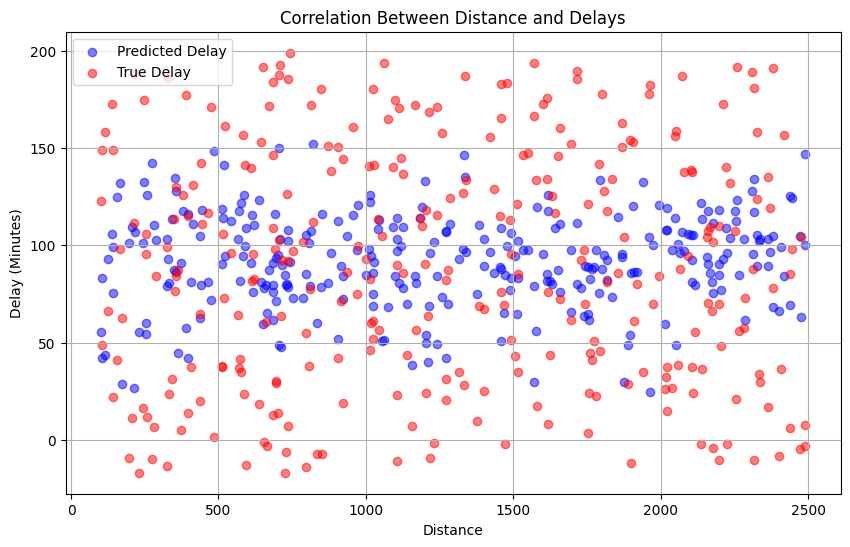

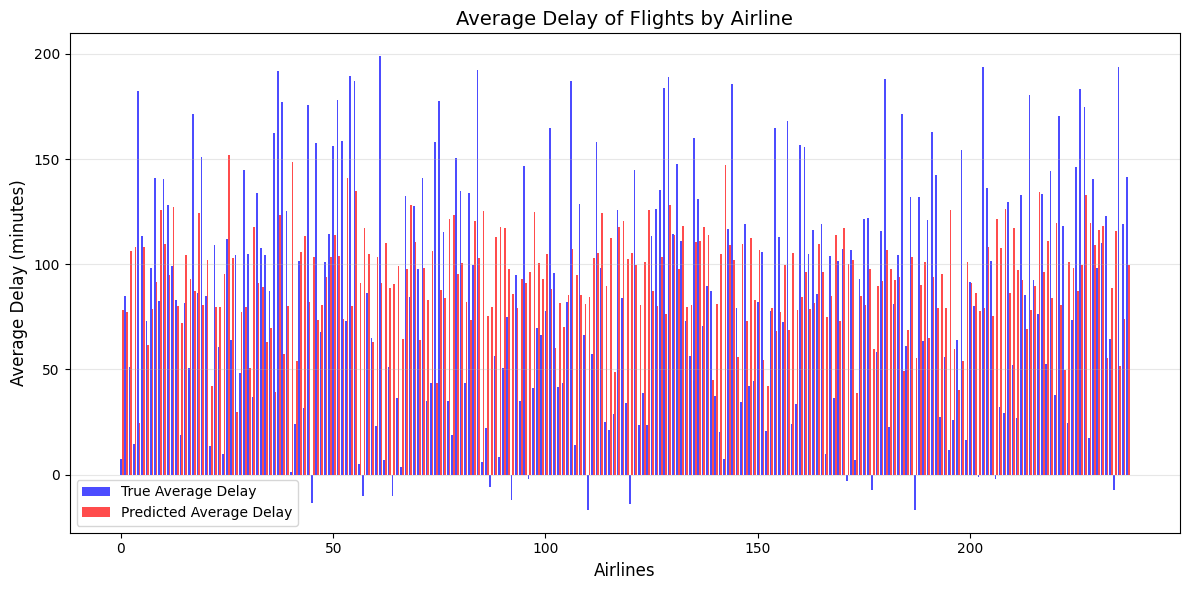

In [17]:
import matplotlib.pyplot as plt
from catboost import Pool
import numpy as np

# Identify categorical features
categorical_features = list(X.select_dtypes(include=['object']).columns)  # Assuming original X is used here

# Train CatBoost with categorical features specified
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
catboost_model.fit(train_pool)

# Prepare the test pool
test_pool = Pool(data=X_test, cat_features=categorical_features)

# Predict using CatBoost
y_pred_catboost = catboost_model.predict(test_pool)

# Add predictions to the test set
X_test_df = pd.DataFrame(X_test, columns=[f"PC{i}" for i in range(X_test.shape[1])])
X_test_df['Predicted_Delay'] = y_pred_catboost
X_test_df['True_Delay'] = y_test.reset_index(drop=True)

# Ensure 'DISTANCE' is correctly scaled for plotting
distance_index = list(X.columns).index("DISTANCE")  # Find the index of 'DISTANCE'
distances = X_test['DISTANCE']

# Plot 1: Correlation Between Distance and Delays
plt.figure(figsize=(10, 6))
plt.scatter(distances, y_pred_catboost, alpha=0.5, label="Predicted Delay", color="blue")
plt.scatter(distances, y_test, alpha=0.5, label="True Delay", color="red")
plt.title("Correlation Between Distance and Delays")
plt.xlabel("Distance")
plt.ylabel("Delay (Minutes)")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Average Delay Per Airline
    # Add predictions to the test set
X_test['True Delay'] = y_test.values
X_test['Predicted Delay'] = y_pred_catboost

# Map airlines to their original test data
X_test['Airline'] = data.loc[X_test.index, 'OP_CARRIER_FL_NUM']

# Calculate average delays by airline
average_delays = X_test.groupby('Airline')[['True Delay', 'Predicted Delay']].mean().reset_index()

# Plotting
bar_width = 0.4
index = np.arange(len(average_delays))

plt.figure(figsize=(12, 6))

# Plot true delays and predicted delays side by side
plt.bar(index, average_delays['True Delay'], bar_width, label='True Average Delay', color='b', alpha=0.7)
plt.bar(index + bar_width, average_delays['Predicted Delay'], bar_width, label='Predicted Average Delay', color='r', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Airlines', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.title('Average Delay of Flights by Airline', fontsize=14)
#plt.xticks(index + bar_width / 2, average_delays['Airline'], rotation=45, fontsize=10)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


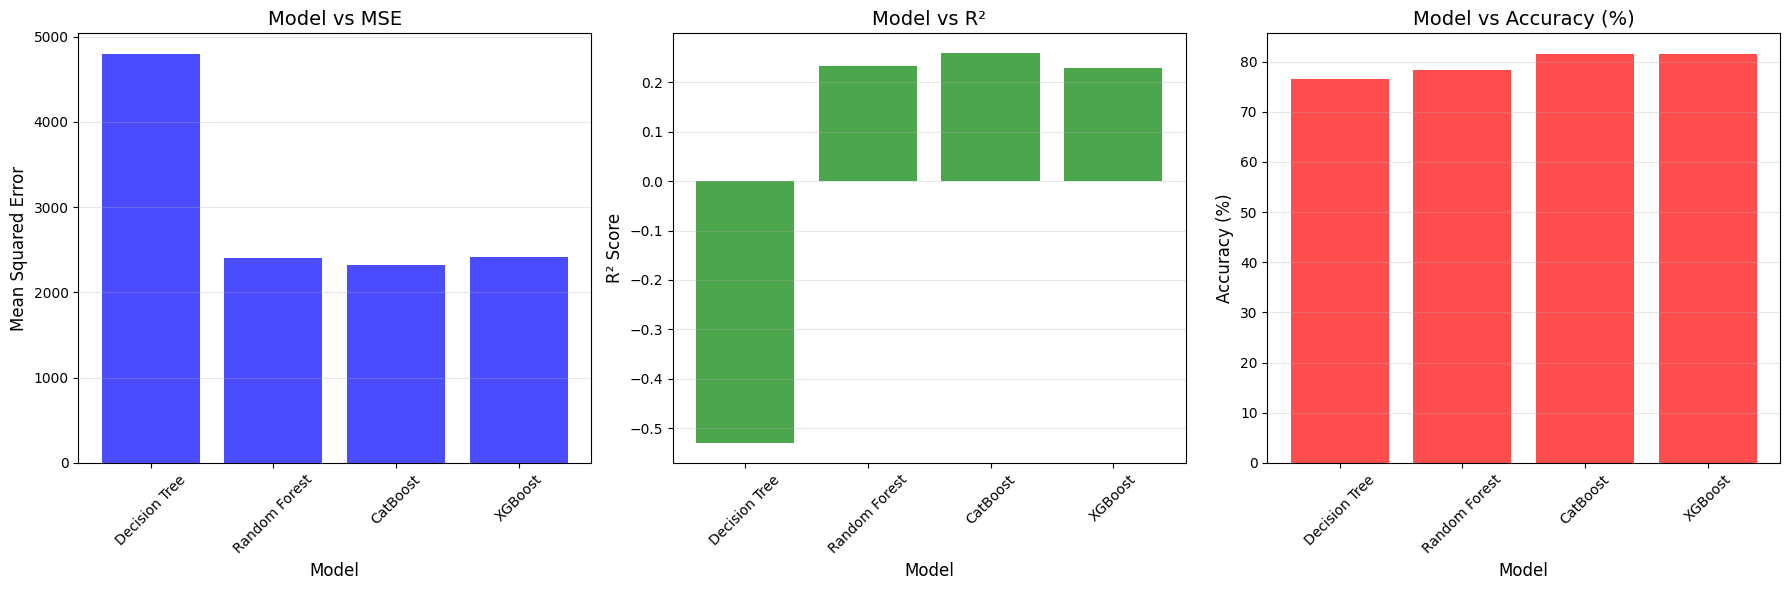

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and corresponding metrics
models = results_df.index
mse_scores = results_df['MSE']
r2_scores = results_df['R2']
accuracy_scores = results_df['Accuracy (%)']

# Create a figure with subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE (Mean Squared Error) Comparison
ax[0].bar(models, mse_scores, color='b', alpha=0.7)
ax[0].set_title('Model vs MSE', fontsize=14)
ax[0].set_xlabel('Model', fontsize=12)
ax[0].set_ylabel('Mean Squared Error', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', alpha=0.3)

# Plot R² (R-squared) Comparison
ax[1].bar(models, r2_scores, color='g', alpha=0.7)
ax[1].set_title('Model vs R²', fontsize=14)
ax[1].set_xlabel('Model', fontsize=12)
ax[1].set_ylabel('R² Score', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', alpha=0.3)

# Plot Accuracy (%) Comparison
ax[2].bar(models, accuracy_scores, color='r', alpha=0.7)
ax[2].set_title('Model vs Accuracy (%)', fontsize=14)
ax[2].set_xlabel('Model', fontsize=12)
ax[2].set_ylabel('Accuracy (%)', fontsize=12)
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(axis='y', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()
